# Libraries

In this section we will import the libraries developed to simulate Adam, first-order and second-order integrodifferential Adam 

In [1]:
from optimizer.adam import grad_f, Adam, mse_loss, grad_mse
from ide_solver.ide import AdamIDE, AdamIDE2
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time

# Settings:

In this section by specifying the setting used for the chosen example.

In [2]:
### Parameter grid
param_grid = {
    'lr': [0.1, 0.01, 0.001],
    'beta1': [0.9, 0.25],
    'beta2': [0.999, 0.25],
}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

### numpy seed
np.random.seed(33)

## Initial Theta:
theta_initial = np.random.uniform(-10,10)
theta_initial_dot = np.random.uniform(-10,10)

### Choose the function to optimize
example = 1

### Loss function configuration
if example == 2:
    x = np.arange(1,100+1, 1)
    y_true = 2*x # True values for y = 2x
else:
    y_true = None
    x = None

## Verbose
verbose = False

# Adam algorithm from scratch

In this section, we will implement Adam from zero to study the dynamics of this optimiser for different examples for different values of moments and learning rates.

Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.999}

Final parameter value ADAM: theta = 1.9810, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.25}

Final parameter value ADAM: theta = 2.1778, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.1, 'beta1': 0.25, 'beta2': 0.999}

Final parameter value ADAM: theta = 1.8071, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.1, 'beta1': 0.25, 'beta2': 0.25}

Final parameter value ADAM: theta = 2.0302, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.999}

Final parameter value ADAM: theta = 1.8849, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.25}

Final parameter value ADAM: theta = 1.9998, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.01, 'beta1': 0.25, 'beta2': 0.999}

Final parameter value ADAM: theta = 1.8682, with elapsed time: 0.00 minutes.
Adam Configuratio

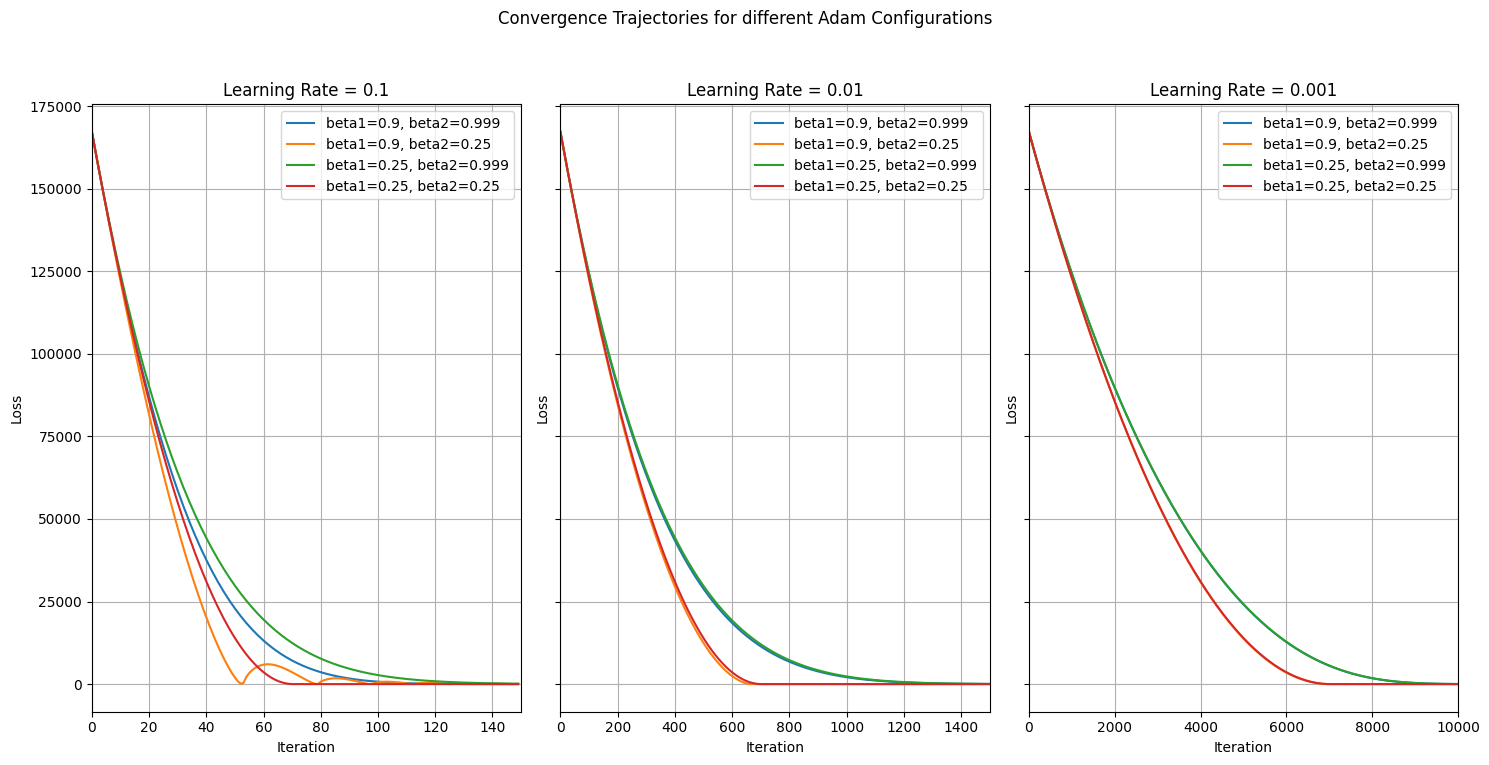

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 8), sharey=True)    
fig.suptitle('Convergence Trajectories for different Adam Configurations')

## Number of epochs/iterations


for i, lr in enumerate(param_grid['lr']):
    ax = axs[i]

    if example == 1:
        
        if lr == 0.1:
            epochs = 300
        elif lr == 0.01:
            epochs = int(3e3)
        elif lr == 0.001:
            epochs = int(1.5e4)

    elif example == 2:

        if lr == 0.1:
            epochs = 150
        elif lr == 0.01:
            epochs = 1500
        elif lr == 0.001:
            epochs = int(1e4)

    for params in [p for p in all_params if p['lr'] == lr]:

        start_time =time.time()

        print(f'Adam Configuration: {params}')
        optimizer = Adam(**params)
        theta = theta_initial
        theta_result = []
        losses =[]
                
        for epoch in range(epochs):
            if example == 1:  
                grad = grad_f(theta)
            elif example == 2:
                y_pred = x * theta
                loss = mse_loss(y_true, y_pred)
                grad = grad_mse(theta, x, y_true)
                losses.append(loss)

            theta = optimizer.update(grad, theta)
            theta_result.append(theta)
            if epoch % 100 == 0 and verbose:
                print(f"Iteration {epoch}: theta = {theta}")
            
        label = f"beta1={params['beta1']}, beta2={params['beta2']}"
        if example == 1:
            ax.plot(theta_result, label=label)
        elif example == 2:
            ax.plot(losses, label=label)
        ax.set_xlim([0, epochs])

        elapsed_time = (time.time() - start_time)/60
        print(f"\nFinal parameter value ADAM: theta = {theta:.4f}, with elapsed time: {elapsed_time:.2f} minutes.")

    ax.set_title(f'Learning Rate = {lr}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Theta value' if example == 1 else 'Loss')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# First-order nonlocal continuous Adam

In this section we will numerically simulate the first-order integrodifferential equation when we approximate Adam algoritm up to first order for the Learning Rate.


Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.999}
Final parameter value ADAMIDE: theta = 3.9976, with elapsed time: 0.00 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.25}
Final parameter value ADAMIDE: theta = 3.9988, with elapsed time: 0.01 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.25, 'beta2': 0.999}
Final parameter value ADAMIDE: theta = 0.2908, with elapsed time: 0.00 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.25, 'beta2': 0.25}
Final parameter value ADAMIDE: theta = 3.9989, with elapsed time: 0.01 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.999}
Final parameter value ADAMIDE: theta = 1.6425, with elapsed time: 0.00 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.25}
Final parameter value ADAMIDE: theta = 3.9986, with elapsed time: 0.04 minutes.

Nonlocal continuous 

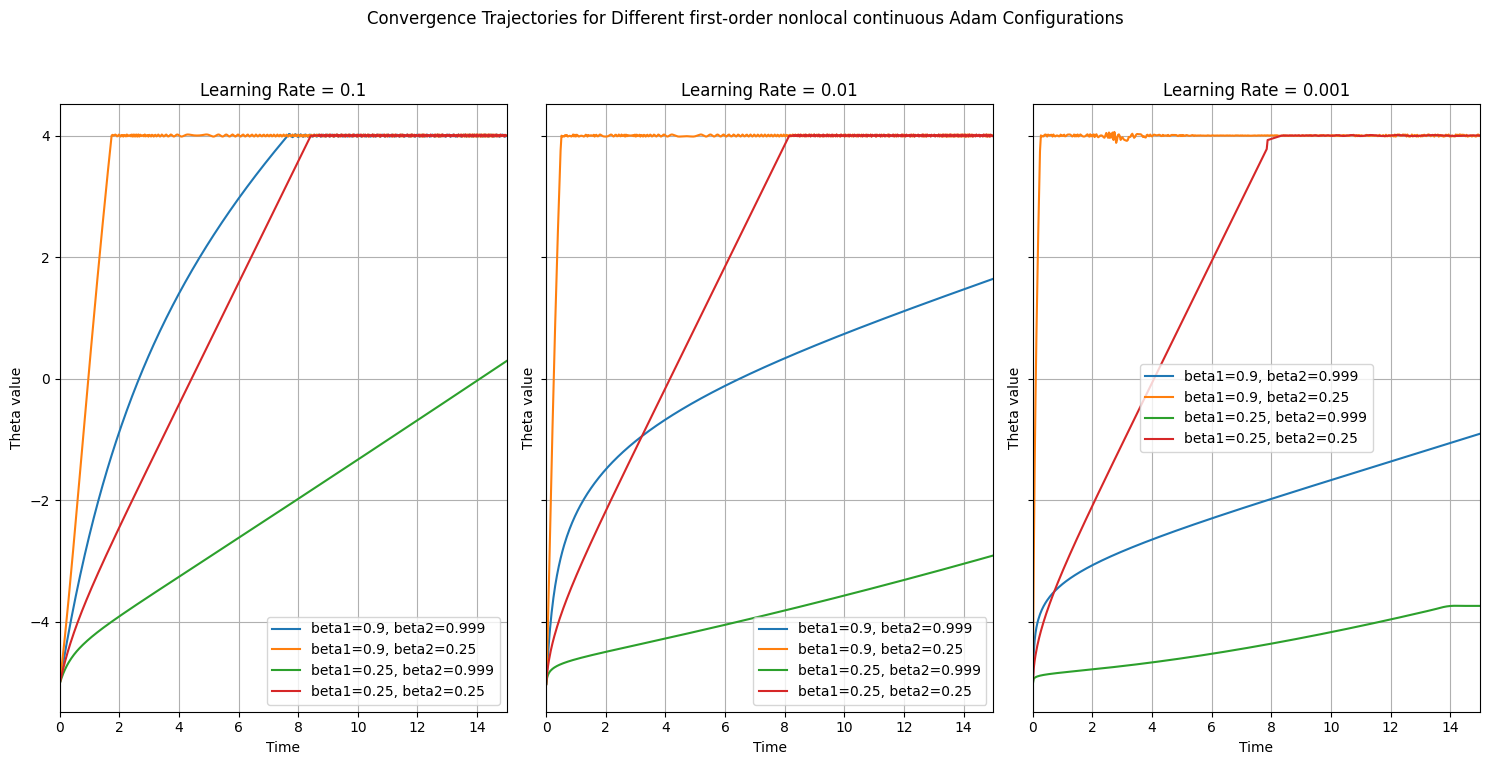

In [25]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 8), sharex=True, sharey=True)   
fig.suptitle('Convergence Trajectories for Different first-order nonlocal continuous Adam Configurations')

t_max = 15
t_span =(1e-12,t_max)
y0 = [theta_initial] ## Initial value for theta

for i, lr in enumerate(param_grid['lr']):
    ax = axs[i]
    filtered_params = [p for p in all_params if p['lr'] == lr]

    for params in filtered_params:

        start_time = time.time()

        print(f'\nNonlocal continuous Adam Configuration: {params}')

        optimizer = AdamIDE(t_span=t_span, alpha=lr, beta=[params['beta1'], params['beta2']], y0=y0, example=example, y_true=y_true, x=x, verbose=False)
        
        if example == 1:
            sol = optimizer.optimize()
        elif example == 2:
            sol, losses_IDE = optimizer.optimize_losses()

        elapsed_time = (time.time() - start_time)/60

        print(f"Final parameter value ADAMIDE: theta = {sol.y[0][-1]:.4f}, with elapsed time: {elapsed_time:.2f} minutes.")

        label = f"beta1={params['beta1']}, beta2={params['beta2']}"
        if example == 1:
            ax.plot(sol.t, sol.y[0], label=label)
            ax.set_ylabel('Theta value')
        elif example == 2:
            ax.plot(losses_IDE['Time'], losses_IDE['Loss'], label=label)
            ax.set_ylabel('Loss')

        ax.set_xlim([0, t_max])
        ax.set_title(f'Learning Rate = {lr}')
        ax.set_yscale('log' if example == 2 else 'linear')
        ax.set_xlabel('Time')
        ax.legend()
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Second-order nonlocal continuous Adam

In this section we will numerically simulate the second-order integrodifferential equation when we approximate Adam algoritm up to second order for the Learning Rate.


Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.999}
Final parameter value ADAMIDE: theta = 4.0000, with elapsed time: 8.51 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.25}
Final parameter value ADAMIDE: theta = 4.0000, with elapsed time: 15.37 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.25, 'beta2': 0.999}
Final parameter value ADAMIDE: theta = 0.2506, with elapsed time: 0.01 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.25, 'beta2': 0.25}
Final parameter value ADAMIDE: theta = 4.0000, with elapsed time: 6.30 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.999}
Final parameter value ADAMIDE: theta = 0.1117, with elapsed time: 0.05 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.25}
Final parameter value ADAMIDE: theta = 4.0000, with elapsed time: 92.07 minutes.

Nonlocal continuou

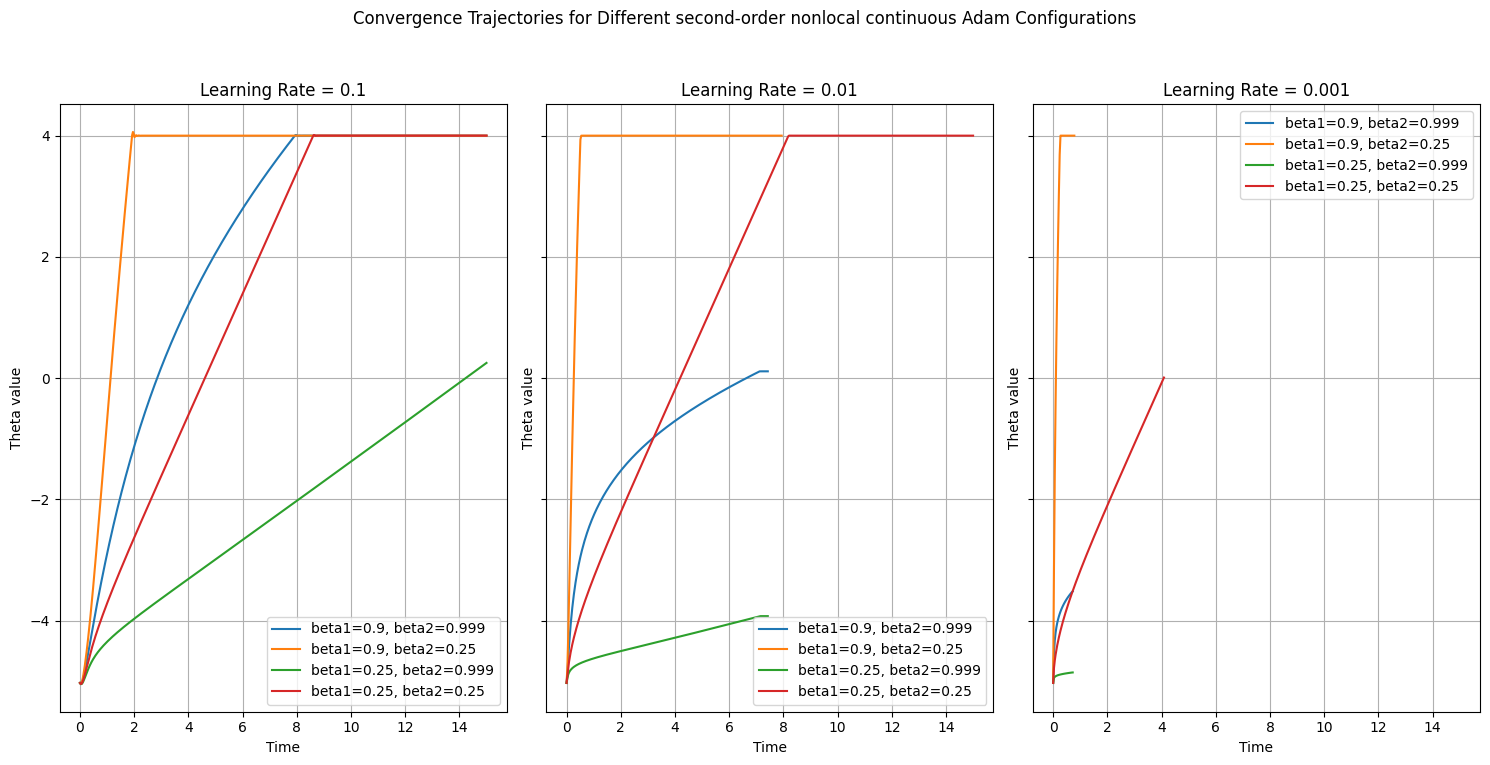

In [3]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 8), sharex=True, sharey=True)   
fig.suptitle('Convergence Trajectories for Different second-order nonlocal continuous Adam Configurations')


t_max = 15
t_span =(1e-12,t_max) ## Time span
y0 = [theta_initial,  theta_initial_dot] ## Initial value for theta and theta dot
omega = 0

for i, lr in enumerate(param_grid['lr']):
    ax = axs[i]
    filtered_params = [p for p in all_params if p['lr'] == lr]

    for params in filtered_params:

        start_time = time.time()

        print(f'\nNonlocal continuous Adam Configuration: {params}')

        optimizer = AdamIDE2(t_span=t_span, omega=omega, alpha=lr, beta=[params['beta1'], params['beta2']], 
                             y0=y0, example=example, y_true=y_true, x=x, verbose=False)
        
        if example == 1:
            sol = optimizer.optimize()
        elif example == 2:
            sol, losses_IDE = optimizer.optimize_losses()

        elapsed_time = (time.time() - start_time)/60

        print(f"Final parameter value ADAMIDE: theta = {sol.y[0][-1]:.4f}, with elapsed time: {elapsed_time:.2f} minutes.")

        label = f"beta1={params['beta1']}, beta2={params['beta2']}"
        if example == 1:
            ax.plot(sol.t, sol.y[0], label=label)
            ax.set_ylabel('Theta value')
        elif example == 2:
            ax.plot(losses_IDE['Time'], losses_IDE['Loss'], label=label)
            ax.set_ylabel('Loss')
        ax.set_title(f'Learning Rate = {lr}')
        ax.set_yscale('log' if example == 2 else 'linear')
        ax.set_xlabel('Time')
        ax.legend()
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()